# Spotted star

In [95]:
import starry
import numpy as np
import matplotlib.pyplot as pl

In [96]:
%matplotlib inline

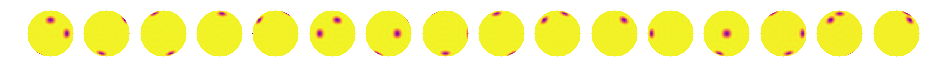

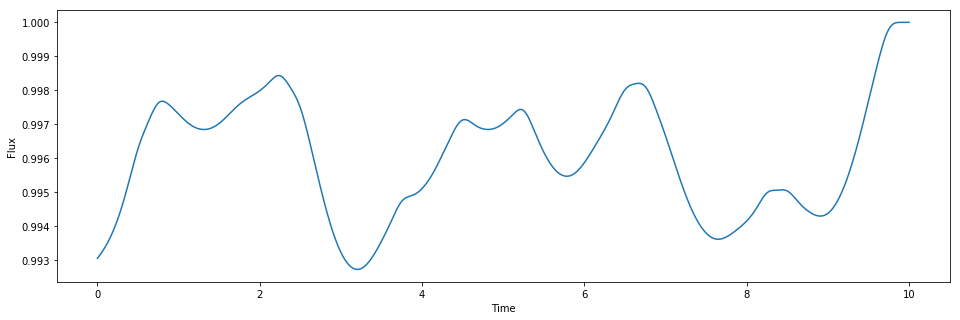

In [97]:
# Our time array: observation spans 10 days
time = np.linspace(0, 10, 1000)

# Spot 1
spot1 = starry.Map(20)
spot1.load_image('spot')
spot1.rotate(axis=(1,0,0),theta=-np.pi/5)
theta1 = 2 * np.pi / 3 * time

# Spot 2
spot2 = starry.Map(20)
spot2.load_image('spot')
spot2.rotate(axis=(0,1,0),theta=np.pi/4)
theta2 = 2 * np.pi / 4 * time

# Spot 3
spot3 = starry.Map(20)
spot3.load_image('spot')
spot3.rotate(axis=(1,0,0),theta=-np.pi/3)
spot3.rotate(axis=(0,1,0),theta=np.pi)
theta3 = 2 * np.pi / 3.5 * time

# Spot 4
spot4 = starry.Map(20)
spot4.load_image('spot')
spot4.rotate(axis=(1,0,0),theta=np.pi/3)
spot4.rotate(axis=(0,1,0),theta=-np.pi/2)
theta4 = 2 * np.pi / 3.5 * time

# Plot the map
fig, ax = pl.subplots(1,16, figsize=(16, 1))
x, y = np.meshgrid(np.linspace(-1, 1, 75), np.linspace(-1, 1, 75))
for n, axis in zip(np.linspace(0, 1000, 16, endpoint=False), ax):
    n = int(n)
    img1 = np.array([spot1.evaluate(theta=theta1[n], x=x[j], y=y[j]) for j in range(75)])
    img2 = np.array([spot2.evaluate(theta=theta2[n], x=x[j], y=y[j]) for j in range(75)])
    img3 = np.array([spot3.evaluate(theta=theta3[n], x=x[j], y=y[j]) for j in range(75)])
    img4 = np.array([spot4.evaluate(theta=theta4[n], x=x[j], y=y[j]) for j in range(75)])
    img = img1 + img2 + img3 + img4
    img /= np.nanmax(img)
    axis.imshow(img, cmap='plasma', origin='lower', vmax=1., vmin=0.75);
    axis.axis('off');

# Plot the combined light curve
lc1 = spot1.flux(axis=(0,1,0), theta=theta1)
lc2 = spot2.flux(axis=(0,1,0), theta=theta2)
lc3 = spot3.flux(axis=(0,1,0), theta=theta3)
lc4 = spot4.flux(axis=(0,1,0), theta=theta4)
lc = lc1 + lc2 + lc3 + lc4
lc /= np.nanmax(lc)
fig, ax = pl.subplots(1, figsize=(16, 5))
ax.plot(time, lc);
ax.set_ylabel("Flux");
ax.set_xlabel("Time");